In [1]:
import os
import glob
import numpy
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
import geopandas
from descartes import PolygonPatch
import random
import numpy as np
import random
from rasterio.windows import from_bounds
from shapely.geometry import Polygon, MultiPolygon
random.seed(10)

In [2]:
# here datapath
data = "/Users/nish/Workspaces/Satellite_Fusion/data/SN6_buildings_AOI_11_Rotterdam_train_sample/AOI_11_Rotterdam"

In [3]:
test_no = 1

In [4]:
geojsons = sorted(glob.glob(f"{os.path.join(data, 'geojson_buildings')}/*.geojson"), key=lambda s: int(s.split("_tile_")[1].split('.')[0]))
test_geo = geojsons[test_no]
test_geo

'/Users/nish/Workspaces/Satellite_Fusion/data/SN6_buildings_AOI_11_Rotterdam_train_sample/AOI_11_Rotterdam/geojson_buildings/SN6_Train_AOI_11_Rotterdam_Buildings_20190804120223_20190804120456_tile_69.geojson'

In [5]:
len(geojsons)

10

In [6]:
tifs = sorted(glob.glob(f"{os.path.join(data, 'PS-RGBNIR')}/*.tif"), key=lambda s: int(s.split("_tile_")[1].split('.')[0]))
test_tif = tifs[test_no]
test_tif

'/Users/nish/Workspaces/Satellite_Fusion/data/SN6_buildings_AOI_11_Rotterdam_train_sample/AOI_11_Rotterdam/PS-RGBNIR/SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804120223_20190804120456_tile_69.tif'

In [7]:
datas = list(zip(tifs, geojsons))
datas[test_no]

('/Users/nish/Workspaces/Satellite_Fusion/data/SN6_buildings_AOI_11_Rotterdam_train_sample/AOI_11_Rotterdam/PS-RGBNIR/SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804120223_20190804120456_tile_69.tif',
 '/Users/nish/Workspaces/Satellite_Fusion/data/SN6_buildings_AOI_11_Rotterdam_train_sample/AOI_11_Rotterdam/geojson_buildings/SN6_Train_AOI_11_Rotterdam_Buildings_20190804120223_20190804120456_tile_69.geojson')

In [8]:
win = Window(512, 512, 512, 512)

In [9]:
with rio.open(test_tif) as src:
    window = from_bounds(*src.bounds, src.transform)
    srcdata = src.read(window=window)

In [10]:
src = rio.open(test_tif)

In [11]:
win.width

512

In [12]:
src.shape

(900, 900)

In [13]:
src.bounds

BoundingBox(left=596036.1399464327, bottom=5751614.174681294, right=596486.1382388433, top=5752064.1729737045)

In [14]:
srcdata[1].shape

(900, 900)

In [15]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 900, 'height': 900, 'count': 4, 'crs': CRS.from_epsg(32631), 'transform': Affine(0.49999810267850525, 0.0, 596036.1399464327,
       0.0, -0.49999810267850525, 5752064.1729737045), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


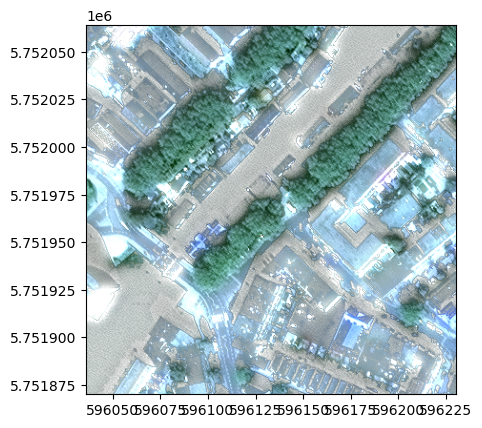

<Axes: >

In [16]:
show(src.read(window=win), transform=src.transform)

In [17]:
gdf = geopandas.read_file(test_geo, window=win)

In [18]:
gdf

,roof_075mean,roof_075median,roof_075stdev,Building_ID,origarea,origlen,partialDec,truncated,geometry
0,3.040000,3.04,0.000000,45654,6.633896,0,1.0,0,"POLYGON Z ((596429.698 5751823.277 0.000, 5964..."
1,10.817453,10.02,2.244105,46516,1332.962800,0,1.0,0,"POLYGON Z ((596343.176 5751826.197 0.000, 5963..."
2,10.204665,10.28,0.178827,46521,718.828253,0,1.0,0,"POLYGON Z ((596275.066 5751808.689 0.000, 5962..."
3,3.100000,3.10,0.000000,45703,12.070551,0,1.0,0,"POLYGON Z ((596438.415 5751834.237 0.000, 5964..."
4,11.102145,12.30,2.668169,100,2174.924238,0,1.0,0,"POLYGON Z ((596371.690 5751847.637 0.000, 5963..."
...,...,...,...,...,...,...,...,...,...
173,0.570000,0.57,0.000000,47179,158.038246,0,1.0,0,"POLYGON Z ((596045.703 5751977.492 0.000, 5960..."
174,9.971555,10.17,1.558473,47206,251.643707,0,1.0,0,"POLYGON Z ((596095.080 5751978.803 0.000, 5960..."
175,10.319669,10.26,0.059999,47204,180.794715,0,1.0,0,"POLYGON Z ((596232.817 5751980.377 0.000, 5962..."
176,9.438192,9.25,0.263708,47211,279.639977,0,1.0,0,"POLYGON Z ((596163.653 5751979.587 0.000, 5961..."


In [19]:
gdf.to_csv('test_orig.csv')

In [20]:
len(gdf)

178

In [21]:
mp = [gdf['geometry'][i] for i, _ in enumerate(gdf['geometry']) if gdf['geometry'][i].geom_type == 'MultiPolygon']

In [22]:
mp2 = [list(poly.exterior.coords) for poly in list(mp[0].geoms)]

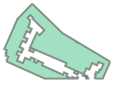

In [23]:
mp[0]

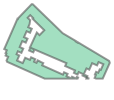

In [24]:
MultiPolygon([Polygon(p) for p in mp2])

<Axes: >

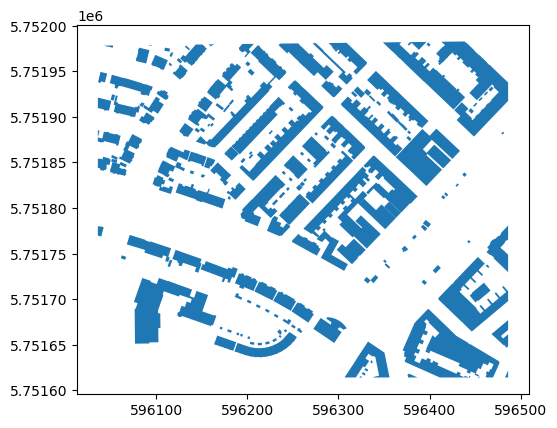

In [25]:
gdf['geometry'].plot()

In [26]:
def plot_gdf(gdf,fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
        
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            # TODO fix bc missing data
            pass
    return(ax)

<Axes: >

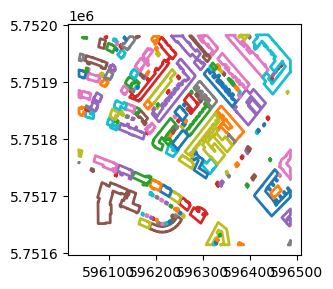

In [27]:
plot_gdf(gdf)

In [28]:
def plot_sat(path,gdf=None, fill=False,linewidth=2):
    f, ax = plt.subplots(1,figsize=(3, 3))
    f.tight_layout()
    
    r = rio.open(path)
    r = r.read()
    r = r.transpose((1,2,0,))
    
    if gdf is not None:
        ax = plot_gdf(gdf,fill=fill,ax=ax,linewidth=linewidth)
    ax.imshow(r)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


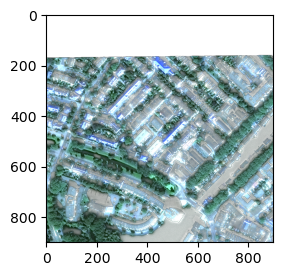

In [29]:
plot_sat(test_tif, gdf)

## HERE

In [30]:
def gdf_maxmin(gdf_, mode):
    
    types = [poly.geom_type for poly in gdf_['geometry']]
    
    if mode == 'max':
        mp  = max([max(list(poly.exterior.coords)) for poly in gdf_['geometry'] \
                            if poly.geom_type=='Polygon'])
        if 'MultiPolygon' in types:
                mmp = max([max(list(poly.exterior.coords)) for lst in [list(poly.geoms) \
                         for poly in gdf_['geometry'] if poly.geom_type=='MultiPolygon'] for poly in lst])
                return max(mp, mmp)
        else: return mp
        
    elif mode == 'min':
        mp = min([min(list(poly.exterior.coords)) for poly in gdf_['geometry'] \
                if poly.geom_type=='Polygon'])
        if 'MultiPolygon' in types:
            mmp = min([min(list(poly.exterior.coords)) for lst in [list(poly.geoms) \
                 for poly in gdf_['geometry'] if poly.geom_type=='MultiPolygon'] for poly in lst])
            return min(mp, mmp)
        else: return mp
        
    else: 
        raise ValueError("Mode is either min or max")

# def gdf_maxmin(gdf_, mode):
    
#     types = [poly.geom_type for poly in gdf_['geometry']]
    
#     if mode == 'max':
#         mp  = max([list(poly.bounds) for poly in gdf_['geometry'] \
#                             if poly.geom_type=='Polygon'])
#         if 'MultiPolygon' in types:
#                 mmp = max([list(poly.bounds) for lst in [list(poly.geoms) \
#                          for poly in gdf_['geometry'] if poly.geom_type=='MultiPolygon'] for poly in lst])
#                 return max(mp, mmp)
#         else: return mp
        
#     elif mode == 'min':
#         mp = min([(list(poly.bounds)) for poly in gdf_['geometry'] \
#                 if poly.geom_type=='Polygon'])
#         if 'MultiPolygon' in types:
#             mmp = min([list(poly.bounds) for lst in [list(poly.geoms) \
#                  for poly in gdf_['geometry'] if poly.geom_type=='MultiPolygon'] for poly in lst])
#             return min(mp, mmp)
#         else: return mp
        
#     else: 
#         raise ValueError("Mode is either min or max")

In [31]:
def gdf_boundsmin(gdf_):
    
    types = [poly.geom_type for poly in gdf_['geometry']]
    
    mp = min(min([list(poly.bounds) for poly in gdf_['geometry'] \
            if poly.geom_type=='Polygon']))
    if 'MultiPolygon' in types:
        mmp = min(min([list(poly.bounds) for lst in [list(poly.geoms) \
             for poly in gdf_['geometry'] if poly.geom_type=='MultiPolygon'] for poly in lst]))
        return min(mp, mmp)
    else: return mp

In [32]:
# def create_meshgrid(src, step=500):

#     def to_pixel_coords(relative_coords, src):
#         return tuple(round(coord // dimension) for coord, dimension in zip(relative_coords, src.shape))

#     left, bottom = to_pixel_coords((src.bounds.left, src.bounds.bottom), src) 
    
#     right, top = to_pixel_coords((src.bounds.right, src.bounds.top), src)
    
#     minc = min([left, bottom, right, top])
    
# #     return (left, bottom, right, top)
#     xx, yy = numpy.meshgrid(numpy.arange(left-minc, bottom, step), 
#                                 numpy.arange(right-minc, top, step))

#     x = [z for x in xx for z in x]
#     y = [z for x in yy for z in x]

#     plt.plot(xx.flat, yy.flat, ".")
#     plt.show()

#     return list(zip(x, y))

def create_meshgrid(gdf_, step=500, factor=1024, plot=True):

    left,  bottom, _  = gdf_maxmin(gdf_, "min") 
    right, top, _    = gdf_maxmin(gdf_, "max")
    
    left, bottom, right, top = [left//factor, bottom//factor, right//factor, top//factor]
    
#     left, bottom, right, top    = gdf_maxmin(gdf_, "max")
    if left > bottom and right > top:
        xx, yy = numpy.meshgrid(numpy.arange(bottom, left, step), 
                            numpy.arange(top, right, step))
    elif left > bottom:
        xx, yy = numpy.meshgrid(numpy.arange(bottom, left, step), 
                            numpy.arange(right, top, step))
    elif right > top:
        xx, yy = numpy.meshgrid(numpy.arange(left,  bottom, step), 
                                numpy.arange(top, right,    step))
    else: 
        xx, yy = numpy.meshgrid(numpy.arange(left, bottom, step), 
                            numpy.arange(right, top, step))

    x = [z for x in xx for z in x]
    y = [z for x in yy for z in x]

    if plot:
        plt.plot(xx.flat, yy.flat, ".")
        plt.show()

    return list(zip(x, y))

In [33]:
# create_meshgrid(src)

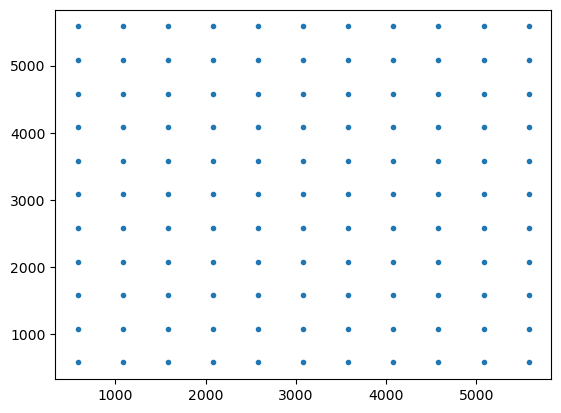

[(582.0, 582.0),
 (1082.0, 582.0),
 (1582.0, 582.0),
 (2082.0, 582.0),
 (2582.0, 582.0),
 (3082.0, 582.0),
 (3582.0, 582.0),
 (4082.0, 582.0),
 (4582.0, 582.0),
 (5082.0, 582.0),
 (5582.0, 582.0),
 (582.0, 1082.0),
 (1082.0, 1082.0),
 (1582.0, 1082.0),
 (2082.0, 1082.0),
 (2582.0, 1082.0),
 (3082.0, 1082.0),
 (3582.0, 1082.0),
 (4082.0, 1082.0),
 (4582.0, 1082.0),
 (5082.0, 1082.0),
 (5582.0, 1082.0),
 (582.0, 1582.0),
 (1082.0, 1582.0),
 (1582.0, 1582.0),
 (2082.0, 1582.0),
 (2582.0, 1582.0),
 (3082.0, 1582.0),
 (3582.0, 1582.0),
 (4082.0, 1582.0),
 (4582.0, 1582.0),
 (5082.0, 1582.0),
 (5582.0, 1582.0),
 (582.0, 2082.0),
 (1082.0, 2082.0),
 (1582.0, 2082.0),
 (2082.0, 2082.0),
 (2582.0, 2082.0),
 (3082.0, 2082.0),
 (3582.0, 2082.0),
 (4082.0, 2082.0),
 (4582.0, 2082.0),
 (5082.0, 2082.0),
 (5582.0, 2082.0),
 (582.0, 2582.0),
 (1082.0, 2582.0),
 (1582.0, 2582.0),
 (2082.0, 2582.0),
 (2582.0, 2582.0),
 (3082.0, 2582.0),
 (3582.0, 2582.0),
 (4082.0, 2582.0),
 (4582.0, 2582.0),
 (5082.0,

In [34]:
# create_meshgrid(gdf, 100, 1)
create_meshgrid(gdf)

In [35]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [36]:
import math

# This function gets just one pair of coordinates based on the angle theta
def get_circle_coord(theta, x_center, y_center, radius):
    x = radius * math.cos(theta) + x_center
    y = radius * math.sin(theta) + y_center
    return (x,y)

# This function gets all the pairs of coordinates
def get_all_circle_coords(x_center, y_center, radius, n_points):
    thetas = [i/n_points * math.tau for i in range(n_points)]
    circle_coords = [get_circle_coord(theta, x_center, y_center, radius) for theta in thetas]
    return circle_coords

def circle_coords_fn(x_center, y_center, radius, n_points, offset=(20,20)):
    """
    Compute circle coordinates using a center point (x, y)
    and radius. The number of coordinates computed is n_points.
    """
    
    thetas = [i/n_points * math.tau for i in range(n_points)]
    
    xoff, yoff = offset
    
    return [(radius*math.cos(theta)+(x_center-xoff), radius*math.sin(theta)+(y_center-yoff)) for theta in thetas]


# Using the second function to generate all the pairs of coordinates.
# circle_coords = circle_coords_fn(x_center = 595134, 
#                                       y_center = 5751614,
#                                       radius = 30,
#                                       n_points = 100)

In [37]:
def plot_gdf_circle(gdf, circ, fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
    
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            pass
    ax.plot(*circ.exterior.xy, linewidth=linewidth)
    
    return(ax)

In [38]:
def plot_gdf_circles(gdf, circs, fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
        
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            pass
    for circ in circs:
        ax.plot(*circ.exterior.xy, linewidth=linewidth)
        ax.axis('tight')
    return(ax)

In [39]:
gdf = geopandas.read_file(test_geo, window=win)

<Axes: >

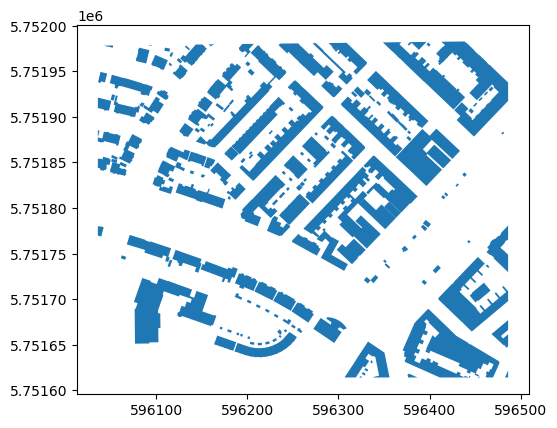

In [40]:
# value of pins, # intersection not empty
# size of pin
testgdf = gdf
testgdf['geometry'].plot()

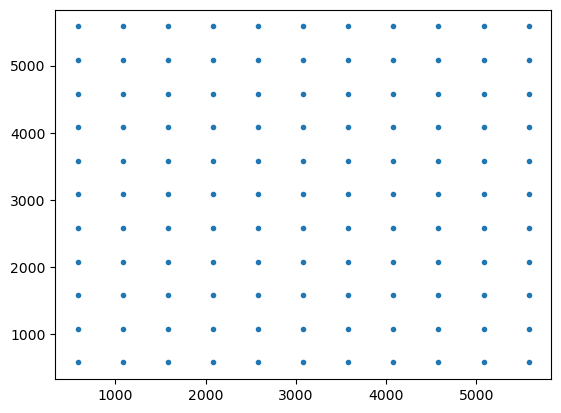

In [41]:
circle_coords = create_meshgrid(testgdf)

In [42]:
max(circle_coords)

(5582.0, 5582.0)

In [43]:
circle_coords

[(582.0, 582.0),
 (1082.0, 582.0),
 (1582.0, 582.0),
 (2082.0, 582.0),
 (2582.0, 582.0),
 (3082.0, 582.0),
 (3582.0, 582.0),
 (4082.0, 582.0),
 (4582.0, 582.0),
 (5082.0, 582.0),
 (5582.0, 582.0),
 (582.0, 1082.0),
 (1082.0, 1082.0),
 (1582.0, 1082.0),
 (2082.0, 1082.0),
 (2582.0, 1082.0),
 (3082.0, 1082.0),
 (3582.0, 1082.0),
 (4082.0, 1082.0),
 (4582.0, 1082.0),
 (5082.0, 1082.0),
 (5582.0, 1082.0),
 (582.0, 1582.0),
 (1082.0, 1582.0),
 (1582.0, 1582.0),
 (2082.0, 1582.0),
 (2582.0, 1582.0),
 (3082.0, 1582.0),
 (3582.0, 1582.0),
 (4082.0, 1582.0),
 (4582.0, 1582.0),
 (5082.0, 1582.0),
 (5582.0, 1582.0),
 (582.0, 2082.0),
 (1082.0, 2082.0),
 (1582.0, 2082.0),
 (2082.0, 2082.0),
 (2582.0, 2082.0),
 (3082.0, 2082.0),
 (3582.0, 2082.0),
 (4082.0, 2082.0),
 (4582.0, 2082.0),
 (5082.0, 2082.0),
 (5582.0, 2082.0),
 (582.0, 2582.0),
 (1082.0, 2582.0),
 (1582.0, 2582.0),
 (2082.0, 2582.0),
 (2582.0, 2582.0),
 (3082.0, 2582.0),
 (3582.0, 2582.0),
 (4082.0, 2582.0),
 (4582.0, 2582.0),
 (5082.0,

In [44]:
circ = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], 1, 100)) for circ_coors in circle_coords]

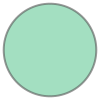

In [45]:
circ[1]

In [46]:
circ[1].bounds

(1061.0, 561.0, 1063.0, 563.0)

In [47]:
type(circ[1])

shapely.geometry.polygon.Polygon

In [48]:
mx = gdf_maxmin(testgdf, 'max')

In [49]:
mn = gdf_maxmin(testgdf, 'min')

In [50]:
orig = (mn[:-1], mx[:-1])
# orig = (mn, mx)

In [51]:
orig

((596036.1399464327, 5751757.774221339),
 (596486.1340560212, 5751937.763907927))

In [52]:
def maxmin(gdf_):
    mx = gdf_maxmin(gdf_, 'max')
    mn = gdf_maxmin(gdf_, 'min')
    return (mn[:-1], mx[:-1])

In [53]:
# [poly.bounds for poly in testgdf['geometry']]

In [54]:
# def pixel_transform(polygon, crcoords, rad):
    
#     hi = max(max(crcoords))
#     lo = 0
    
#     xHiNew, yHiNew = (hi, hi)
#     xLoNew, yLoNew = (lo, lo)
                 
#     xLoOld, yLoOld, xHiOld, yHiOld = polygon.bounds
    
# #     print(xLoOld, yLoOld, xHiOld, yHiOld)

#     centroid = polygon.centroid
#     centerX, centerY = centroid.x, centroid.y
    
# #     print(centerX, centerY)

#     newX = (centerX-xLoOld) / (xHiOld-xLoOld) * (xHiNew-xLoNew) + xLoNew
#     newY = (centerY-yLoOld) / (yHiOld-yLoOld) * (yHiNew-yLoNew) + yLoNew
    
# #     print(newX, newY)
    
#     return Polygon(circle_coords_fn(newX, newY, rad, 100))

# def pixel_transform(polygon, crcoords, rad):
    
#     hi = max(max(crcoords))
#     lo = 0
    
#     xHiNew, yHiNew = (hi, hi)
#     xLoNew, yLoNew = (lo, lo)
    
#     xLoOld, yLoOld, xHiOld, yHiOld = polygon.bounds
    
#     new_poly = []
#     if polygon.geom_type == "Polygon":
#         coords = list(polygon.exterior.coords)
#         for coord in coords:
#             cx, cy, cz = coord
#             assert cz == 0.0
#             newX = (cx-xLoOld) / (xHiOld-xLoOld) * (xHiNew-xLoNew) + xLoNew
#             newY = (cy-yLoOld) / (yHiOld-yLoOld) * (yHiNew-yLoNew) + yLoNew
#             new_poly.append((newX, newY, 0.0))
#         return Polygon(new_poly)
    
#     elif polygon.geom_type == "MultiPolygon":
#         coords = [list(poly.exterior.coords) for poly in list(polygon.geoms)]
#         for lst in coords:
#             sublst = []
#             for coord in lst:
#                 cx, cy, _ = coord
#                 newX = (cx-xLoOld) / (xHiOld-xLoOld) * (xHiNew-xLoNew) + xLoNew
#                 newY = (cy-yLoOld) / (yHiOld-yLoOld) * (yHiNew-yLoNew) + yLoNew
#                 sublst.append((newX, newY, 0.0))
#             new_poly.append(sublst)
            
#         return MultiPolygon([Polygon(p) for p in new_poly])

def pixel_scale(polygon, crcoords, max_):
    
    hi = max(max(crcoords))//8
    lo = min(min(crcoords))
    
    xHiNew, yHiNew = (hi, hi)
    xLoNew, yLoNew = (lo, lo)
    
    LoOld, HiOld = max_
    
    new_poly = []
    if polygon.geom_type == "Polygon":
        coords = list(polygon.exterior.coords)
        for coord in coords:
            cx, cy, cz = coord
            assert cz == 0.0
            newY = ((cy-LoOld[1]) / (HiOld[1]-LoOld[1]) * (yHiNew-yLoNew)) + yLoNew
            newX = ((cx-LoOld[0]) / (HiOld[0]-LoOld[0]) * (xHiNew-xLoNew)) + xLoNew
            new_poly.append((newX, newY, cz))
        return Polygon(new_poly)
    
    elif polygon.geom_type == "MultiPolygon":
        coords = [list(poly.exterior.coords) for poly in list(polygon.geoms)]
        for lst in coords:
            sublst = []
            for coord in lst:
                cx, cy, cz = coord
                assert cz == 0.0
                newY = ((cy-LoOld[1]) / (HiOld[1]-LoOld[1]) * (yHiNew-yLoNew)) + yLoNew
                newX = ((cx-LoOld[0]) / (HiOld[0]-LoOld[0]) * (xHiNew-xLoNew)) + xLoNew
                sublst.append((newX, newY, cz))
            new_poly.append(sublst)
            
        return MultiPolygon([Polygon(p) for p in new_poly])

In [55]:
testgdf['geometry'] = testgdf['geometry'].apply(lambda x: pixel_scale(x, circle_coords, orig))

In [56]:
len(testgdf['geometry'])

178

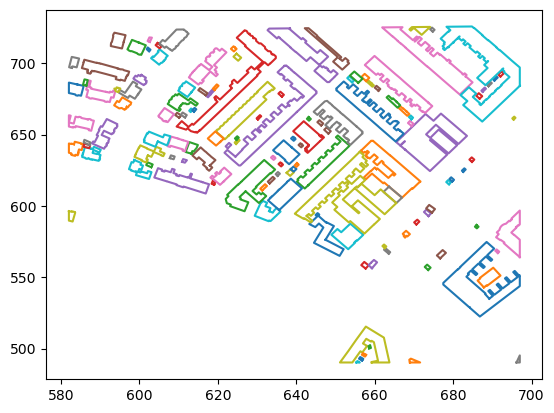

In [57]:
try:
    for i in range(len(testgdf['geometry'])):
        plt.plot(*testgdf['geometry'][i].exterior.xy)
except AttributeError:
    pass

In [58]:
testgdf.to_csv('test.csv')

<Axes: >

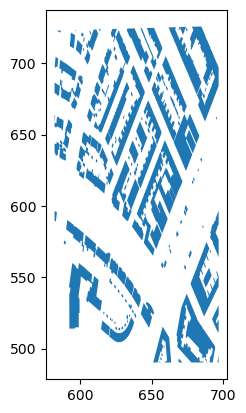

In [59]:
# should start at zero
# drop pins, and count fraction of blue pixels around pins
testgdf['geometry'].plot()

In [60]:
testgdf['geometry']

0      POLYGON Z ((682.577 623.852 0.000, 682.230 624...
1      POLYGON Z ((660.466 625.717 0.000, 660.677 626...
2      POLYGON Z ((643.060 614.530 0.000, 642.164 612...
3      POLYGON Z ((684.805 630.854 0.000, 684.143 632...
4      POLYGON Z ((667.753 639.416 0.000, 666.514 642...
                             ...                        
173    POLYGON Z ((584.444 722.383 0.000, 584.389 721...
174    POLYGON Z ((597.063 723.221 0.000, 597.008 722...
175    POLYGON Z ((632.262 724.227 0.000, 632.209 724...
176    POLYGON Z ((614.587 723.722 0.000, 614.455 723...
177    POLYGON Z ((656.693 712.901 0.000, 657.348 711...
Name: geometry, Length: 178, dtype: geometry

In [61]:
mn2 = gdf_boundsmin(testgdf)

In [62]:
mn2

490.2532649856307

In [63]:
def pixel_translate(polygon, step):

#     try:
#         x1, y1, x2, y2 = min(min(step))
#         xstep = min(x1, x2)
#         ystep = min(y1, y2)
#     except TypeError:
#         xstep = min(min(step))
#         ystep = min(min(step))
    
    new_poly = []
    if polygon.geom_type == "Polygon":
        coords = list(polygon.exterior.coords)
        for coord in coords:
            cx, cy, cz = coord
            assert cz == 0.0
            newY = cy - step
            newX = cx #+ np.abs(step)
            new_poly.append((newX, newY, cz))
        return Polygon(new_poly)
    
    elif polygon.geom_type == "MultiPolygon":
        coords = [list(poly.exterior.coords) for poly in list(polygon.geoms)]
        for lst in coords:
            sublst = []
            for coord in lst:
                cx, cy, cz = coord
                assert cz == 0.0
                newY = cy - step
                newX = cx #+ np.abs(step)
                sublst.append((newX, newY, cz))
            new_poly.append(sublst)
            
        return MultiPolygon([Polygon(p) for p in new_poly])

In [64]:
testgdf['geometry'] = testgdf['geometry'].apply(lambda x: pixel_translate(x, mn2))

<Axes: >

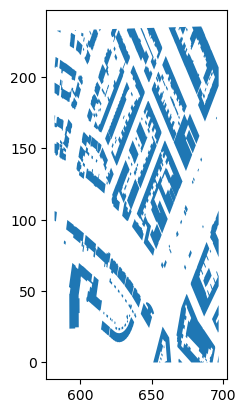

In [65]:
testgdf['geometry'].plot()

In [66]:
# create_meshgrid(testgdf, scale=False)

<Axes: >

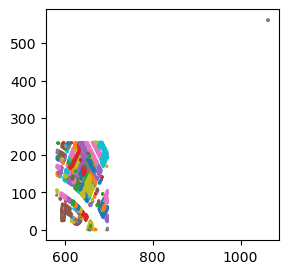

In [67]:
plot_gdf_circle(testgdf, circ[1])

In [85]:
# main generator
def generate_pin_counts(data_list, rad=20, step=100, stop=6, crs='epsg:32631', off=(20, 20)):
    """
    Generate random pins (x, y) and count of buildings 
    in a given list of geojsons
    """
    out = []
    N = 0
    for rastr, geojs in data_list:
#         src = rio.open(rastr)
        gdf_ = geopandas.read_file(geojs)
        grid = create_meshgrid(gdf_, plot=False)
        max_ = maxmin(gdf_)
        circs = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], rad, 100, offset=off)) for circ_coors in grid]
        gdf_['geometry'] = gdf_['geometry'].apply(lambda x: pixel_scale(x, grid, max_))
        min_ = gdf_boundsmin(gdf_)
#         if min(min(min(min_))) < 0:
        gdf_['geometry'] = gdf_['geometry'].apply(lambda x: pixel_translate(x, min_))
        
        grid = create_meshgrid(gdf_, 50, 1, plot=False)
        circs = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], 10, 100, offset=off)) for circ_coors in grid]
        
        circ_gdfs = [geopandas.GeoDataFrame(index=[0], geometry=[circ]) for circ in circs]
        xy = list(zip(circs, grid))
#         plot_gdf_circles(gdf, circs)
        # (x, y) -> (circ, pt)
        lst = [((y[0], y[1]), len(geopandas.sjoin(geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[x]), gdf_))) for x,y in xy]
        out.append([rastr, [x for x, _ in lst], [y for _, y in lst]])
        N += 1
        if N >= stop:
            break
    return out

In [86]:
import time

68.30114698410034


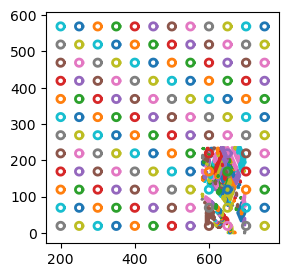

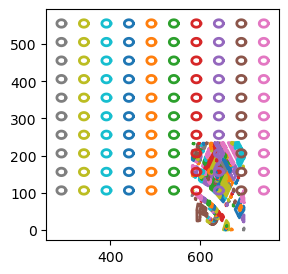

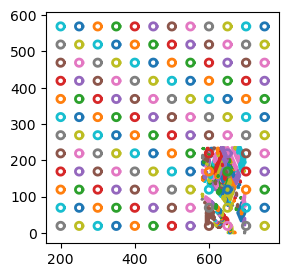

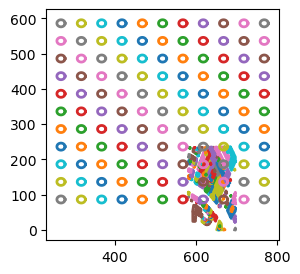

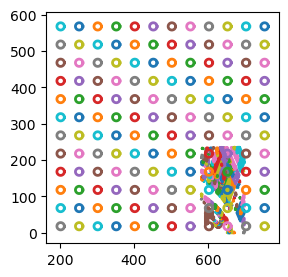

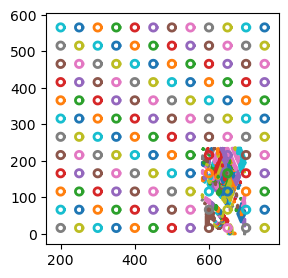

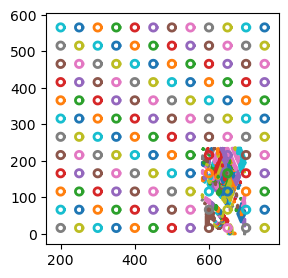

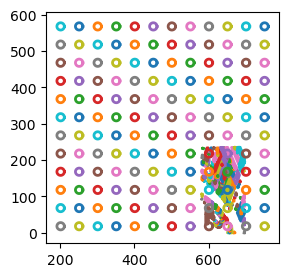

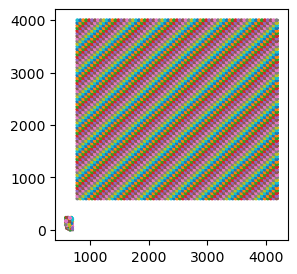

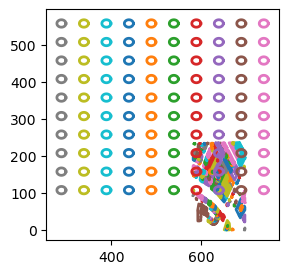

In [87]:
start_time = time.time()
out = generate_pin_counts(datas, rad=50, step=500, stop=len(datas), off=(-200, 100))
elapsed_time = time.time() - start_time
print(elapsed_time)

In [88]:
[max(out[i][2]) for i in range(len(out))]

[12, 7, 6, 2, 22, 26, 1, 1, 0, 5]

In [89]:
[np.nonzero(out[i][2]) for i in range(len(out))]

[(array([ 8,  9, 10, 20, 21, 22, 32, 33, 34]),),
 (array([ 6,  7,  8, 16, 17, 18, 26, 27, 28]),),
 (array([ 8,  9, 10, 20, 21, 22, 32, 33, 34]),),
 (array([ 7, 30, 40]),),
 (array([ 9, 10, 20, 21, 22, 32, 33, 34]),),
 (array([ 8,  9, 10, 20, 21, 22, 32, 33, 34]),),
 (array([ 8, 20, 21, 32, 33, 34, 44, 45, 56]),),
 (array([ 33,  34,  46,  56,  58,  68, 117, 129, 141]),),
 (array([], dtype=int64),),
 (array([ 6,  8, 16, 17, 18, 26, 27, 28, 36, 37, 38, 46, 47, 48, 56, 58, 66,
         68, 76, 77, 78, 86, 87, 88, 96, 97, 98]),)]

In [95]:
import pandas as pd
pd.DataFrame(out).to_csv('building_test.csv')

In [ ]:
# crop to 512 x 512